# Personality Prediction With Handwriting (from Kaggle)

## PACKAGES AND LIBRARIES

In [1]:
#!pip install wheel 
#!pip install missingno
#!pip install --upgrade pip
#!pip3 install xgboost==0.7.post4
#!brew install lightgbm - takes forever....
#!pip install catboost
#!pip3 install opencv-python-headless
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
'''
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
import missingno as msno
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.neighbors import LocalOutlierFactor
from scipy.stats import levene
from scipy.stats import shapiro
from scipy.stats.stats import pearsonr
'''
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
'''
from sklearn.model_selection import ShuffleSplit, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
'''
from sklearn.preprocessing import StandardScaler
'''
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier
from lightgbm import LGBMRegressor, LGBMClassifier
from catboost import CatBoostRegressor, CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
'''
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from tensorflow.keras.utils.np_utils import to_categorical 
import os
import os.path
from pathlib import Path
import cv2

In [2]:
filterwarnings("ignore", category=DeprecationWarning) 
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

## PATH PROCESS

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
dataTrain = Path("../content/gdrive/My Drive/Colab Notebooks/AML/AML Project/handwriting_dataset/training_set")
filepath = list(dataTrain.glob(r"**/*.jpg"))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepath))

## DATA FOR VISUALIZATION

In [5]:
filepath = pd.Series(filepath, name='Filepath').astype(str)
labels = pd.Series(labels,name="Labels")
#drop Extraversion 
filepath = filepath.drop([*range(6)])
labels = labels.drop([*range(6)])

In [6]:
# Read the images and store it to ListA
ListA = []
for i in filepath:
    image = cv2.imread(i,0)
    ListA.append(np.array(image,"uint8"))

In [7]:
ListA = pd.Series(ListA,name="Array")

In [8]:
# Vectorized image
ListA

0      [[175, 175, 176, 176, 176, 176, 176, 176, 177,...
1      [[178, 177, 176, 176, 181, 181, 178, 179, 179,...
2      [[136, 135, 140, 149, 140, 140, 142, 139, 139,...
3      [[172, 171, 172, 174, 173, 172, 171, 172, 172,...
4      [[45, 46, 46, 51, 51, 51, 54, 53, 51, 58, 53, ...
                             ...                        
115    [[181, 180, 181, 181, 181, 181, 181, 182, 181,...
116    [[164, 163, 163, 166, 167, 164, 165, 168, 168,...
117    [[151, 151, 150, 151, 155, 155, 152, 151, 151,...
118    [[155, 155, 155, 156, 156, 156, 157, 157, 157,...
119    [[107, 108, 108, 107, 107, 108, 108, 107, 108,...
Name: Array, Length: 120, dtype: object

In [9]:
# Construct main data and copy it
MainData = pd.concat([ListA,labels],axis=1)
data = MainData.copy() # to protect main data

In [10]:
print(data["Labels"].value_counts())

Openness             50
Neuroticism          24
Agreeableness        24
Conscientiousness    22
Name: Labels, dtype: int64


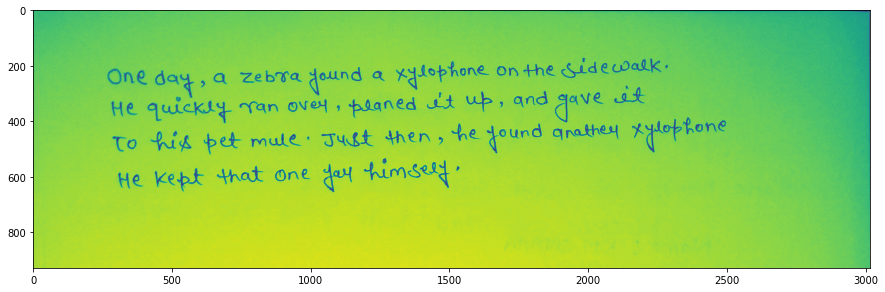

In [11]:
figure = plt.figure(figsize=(15,8))
plt.imshow(data["Array"][13])

In [12]:
data['Array'].iloc[0]

array([[175, 175, 176, ...,  42,  51,  53],
       [176, 176, 176, ...,  44,  53,  51],
       [176, 176, 176, ...,  36,  49,  49],
       ...,
       [ 58,  58,  60, ...,  37,  39,  35],
       [ 55,  55,  56, ...,  38,  41,  34],
       [ 55,  53,  55, ...,  41,  39,  36]], dtype=uint8)

## DATA FOR MODEL

#### Data Concat

In [13]:
SecondData = pd.concat([filepath,labels],axis=1) # CREATING NEW DATA TO PROTECT MAIN DATA
SecondData.head()

,Filepath,Labels
6,../content/gdrive/My Drive/Colab Notebooks/AML...,Conscientiousness
7,../content/gdrive/My Drive/Colab Notebooks/AML...,Conscientiousness
8,../content/gdrive/My Drive/Colab Notebooks/AML...,Conscientiousness
9,../content/gdrive/My Drive/Colab Notebooks/AML...,Conscientiousness
10,../content/gdrive/My Drive/Colab Notebooks/AML...,Conscientiousness


#### X & Y FOR MODEL

In [14]:
x = SecondData["Filepath"]
y = SecondData["Labels"]

In [15]:
# Encode categorized variables, similar to Getdummy
encode = LabelEncoder()
x = encode.fit_transform(x)
x

array([ 24,  25,  40,  31,  38,  33,  41,  37,  43,  28,  36,  29,  44,
        27,  39,  30,  34,  32,  45,  26,  42,  35,  46,  64,  59,  50,
        65,  47,  53,  68,  58,  62,  51,  54,  61,  57,  56,  67,  55,
        49,  48,  52,  63,  66,  60,  69,  70,  73,  93,  84,  88,  87,
        75,  90,  71,  82,  81,  76,  72,  85,  94,  77,  95,  74,  83,
        89,  80,  92,  86,  79,  78,  91, 119, 114,  97, 115, 108, 106,
       102,  96, 111,  99, 117, 118, 110, 105, 107, 103, 101, 112,  98,
       116, 113, 100, 109, 104,  17,   9,   7,  18,   2,   1,  14,  11,
         5,  19,   4,   0,  23,  16,  22,  20,   6,  10,   8,  15,  13,
        12,  21,   3])

In [16]:
y = encode.fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [17]:
# scale Xs
x = x/max(x)

In [18]:
# convert type to float and reshape x and y
x = np.asarray(x).astype("float32")
x = x.reshape(120,1,1)
y = np.asarray(y).astype("float32")
y = y.reshape(120,1,1)

In [19]:
print("X len: {}\ny len: {}".format(len(x), len(y)))

X len: 120
y len: 120


#### SPLITTING TRAIN & TEST

In [20]:
xTrain,xTest,yTrain,yTest = train_test_split(x,y,test_size=0.1,random_state=42)

In [21]:
print("Training Data:\n\tX Train: {}\n\ty Train: {}\nTest Data:\n\tX Test: {}\n\ty Test: {}".format(xTrain.shape, 
                                                                                                    yTrain.shape,
                                                                                                    xTest.shape,
                                                                                                    yTest.shape))

Training Data:
	X Train: (108, 1, 1)
	y Train: (108, 1, 1)
Test Data:
	X Test: (12, 1, 1)
	y Test: (12, 1, 1)


#### ANN MODEL CREATING

In [22]:
ANNmodel = tf.keras.models.Sequential([
  # inputs 
  #To rescale an input in the [0, 255] range to be in the [0, 1] range, you would pass scale=1./255
  tf.keras.layers.experimental.preprocessing.Rescaling(1./max(xTrain)), 
  tf.keras.layers.Flatten(input_shape=(108,)), # converting Matrix to single array, input shape = train data shape
  # hiddens layers
  tf.keras.layers.Dense(128, activation='relu'), #128 nodes
  tf.keras.layers.Dropout(0.2),  #This is some kind of regularization to prevent overfitting.
  tf.keras.layers.Dense(64, activation='relu'), #64 nodes
  tf.keras.layers.Dropout(0.2),
  # output layer
  tf.keras.layers.Dense(4, activation="softmax")
])

lossfunc = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

ANNmodel.compile(optimizer='rmsprop', loss=lossfunc, metrics=['accuracy'])

In [23]:
Callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)

#### MODEL FITTING

In [24]:
MainModel = ANNmodel.fit(xTrain, yTrain, epochs=60, batch_size=32, verbose=1, validation_data=(xTest,yTest))

Epoch 1/60
4/4 [==============================] - 1s 71ms/step - loss: 1.3207 - accuracy: 0.3796 - val_loss: 1.2842 - val_accuracy: 0.4167
Epoch 2/60
4/4 [==============================] - 0s 9ms/step - loss: 1.2469 - accuracy: 0.4167 - val_loss: 1.2306 - val_accuracy: 0.4167
Epoch 3/60
4/4 [==============================] - 0s 10ms/step - loss: 1.2060 - accuracy: 0.4167 - val_loss: 1.1954 - val_accuracy: 0.4167
Epoch 4/60
4/4 [==============================] - 0s 10ms/step - loss: 1.1728 - accuracy: 0.4167 - val_loss: 1.1692 - val_accuracy: 0.4167
Epoch 5/60
4/4 [==============================] - 0s 10ms/step - loss: 1.1270 - accuracy: 0.4167 - val_loss: 1.1522 - val_accuracy: 0.4167
Epoch 6/60
4/4 [==============================] - 0s 10ms/step - loss: 1.1132 - accuracy: 0.4167 - val_loss: 1.1384 - val_accuracy: 0.4167
Epoch 7/60
4/4 [==============================] - 0s 11ms/step - loss: 1.1025 - accuracy: 0.4167 - val_loss: 1.1252 - val_accuracy: 0.4167
Epoch 8/60
4/4 [============

#### ACCURACY CONTROLLING

In [25]:
result_Model = ANNmodel.evaluate(xTest,yTest)

1/1 [==============================] - 0s 19ms/step - loss: 0.5249 - accuracy: 0.9167


In [26]:
ANNmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 1, 1)              0         
                                                                 
 flatten (Flatten)           (None, 1)                 0         
                                                                 
 dense (Dense)               (None, 128)               256       
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 2

#### MODEL VISUALIZATION

In [27]:
HistoryDict = MainModel.history

val_losses = HistoryDict["val_loss"]
val_acc = HistoryDict["val_accuracy"]
acc = HistoryDict["accuracy"]
losses = HistoryDict["loss"]
epochs = range(1,len(val_losses)+1)

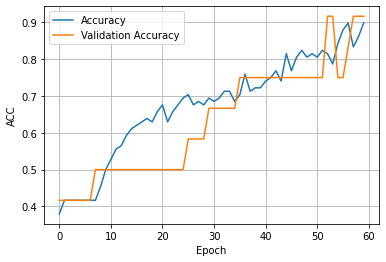

In [28]:
# model losses are stored in the model history
# val_loss = validation loss
plt.plot(acc, label="Accuracy")
plt.plot(val_acc, label="Validation Accuracy")
plt.ylabel("ACC")
plt.xlabel("Epoch")
plt.legend()
plt.grid()

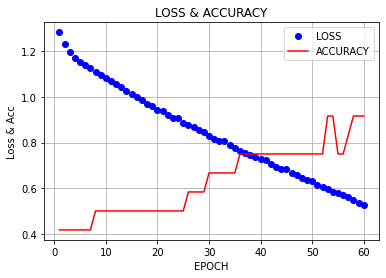

In [29]:
plt.plot(epochs,val_losses,"bo",label="LOSS")
plt.plot(epochs,val_acc,"r",label="ACCURACY")
plt.title("LOSS & ACCURACY")
plt.xlabel("EPOCH")
plt.ylabel("Loss & Acc")
plt.legend()
plt.grid()
plt.show()

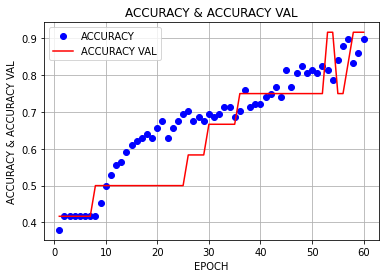

In [30]:
plt.plot(epochs,acc,"bo",label="ACCURACY")
plt.plot(epochs,val_acc,"r",label="ACCURACY VAL")
plt.title("ACCURACY & ACCURACY VAL")
plt.xlabel("EPOCH")
plt.ylabel("ACCURACY & ACCURACY VAL")
plt.legend()
plt.grid()
plt.show()

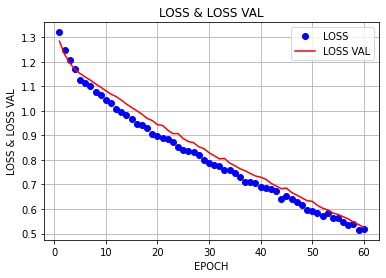

In [31]:
plt.plot(epochs,losses,"bo",label="LOSS")
plt.plot(epochs,val_losses,"r",label="LOSS VAL")
plt.title("LOSS & LOSS VAL")
plt.xlabel("EPOCH")
plt.ylabel("LOSS & LOSS VAL")
plt.legend()
plt.grid()
plt.show()

## Test Data 

In [32]:
dataTest = Path("../content/gdrive/My Drive/Colab Notebooks/AML/AML Project/handwriting_dataset/test_set")
filepath_test = list(dataTest.glob(r"**/*.jpg"))
labels_test = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepath_test))

In [33]:
filepath_test = pd.Series(filepath_test, name='Filepath').astype(str)
labels_test = pd.Series(labels_test,name="Labels")
#drop Extraversion 
filepath_test = filepath_test.drop([34,35])
labels_test = labels_test.drop([34,35])

In [34]:
# Read the images and store it to ListA
ListA_test = []
for i in filepath_test:
    image = cv2.imread(i,0)
    ListA_test.append(np.array(image,"uint8"))
ListA_test = pd.Series(ListA_test, name="Array")
ListA_test[0:5]

0    [[147, 145, 144, 145, 139, 140, 145, 146, 146,...
1    [[148, 148, 150, 148, 149, 150, 150, 151, 152,...
2    [[155, 155, 155, 156, 155, 155, 155, 154, 154,...
3    [[182, 182, 183, 184, 185, 186, 186, 186, 186,...
4    [[177, 177, 179, 177, 176, 177, 177, 177, 177,...
Name: Array, dtype: object

In [35]:
# Construct main data and copy it
MainData_test = pd.concat([ListA_test, labels_test],axis=1)
data_test = MainData_test.copy() # to protect main data

In [36]:
print(data_test["Labels"].value_counts())

Openness             14
Conscientiousness     8
Agreeableness         6
Neuroticism           6
Name: Labels, dtype: int64


In [37]:
SecondDataTst = pd.concat([filepath_test,labels_test],axis=1) # CREATING NEW DATA TO PROTECT MAIN DATA
x_tst = SecondDataTst["Filepath"]
y_tst = SecondDataTst["Labels"]

# Encode categorized variables, similar to Getdummy
encode = LabelEncoder()
x_tst = encode.fit_transform(x_tst)
y_tst = encode.fit_transform(y_tst)

#scale Xs
x_tst = x_tst / max(x_tst)

# convert type to float and reshape x and y
x_tst = np.asarray(x_tst).astype("float32")
x_tst = x_tst.reshape(34,1,1)
y_tst = np.asarray(y_tst).astype("float32")
y_tst = y_tst.reshape(34,1,1)

In [38]:
ANNmodel_test = tf.keras.models.Sequential([
  # inputs 
  #To rescale an input in the [0, 255] range to be in the [0, 1] range, you would pass scale=1./255
  tf.keras.layers.experimental.preprocessing.Rescaling(1./max(x)), 
  tf.keras.layers.Flatten(input_shape=(120,)), # converting Matrix to single array, input shape = train data shape
  # hiddens layers
  tf.keras.layers.Dense(128, activation='relu'), #128 nodes
  #tf.keras.layers.Dropout(0.2),  #This is some kind of regularization to prevent overfitting.
  tf.keras.layers.Dense(64, activation='relu'), #64 nodes
  #tf.keras.layers.Dropout(0.2),
  # output layer
  tf.keras.layers.Dense(4, activation="softmax")
])

lossfunc = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

ANNmodel_test.compile(optimizer='rmsprop', loss=lossfunc, metrics=['accuracy'])

In [39]:
Callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)

In [40]:
MainModel_test = ANNmodel_test.fit(x, y, epochs=60, batch_size=32, verbose=1)

Epoch 1/60
4/4 [==============================] - 1s 4ms/step - loss: 1.3236 - accuracy: 0.4167
Epoch 2/60
4/4 [==============================] - 0s 4ms/step - loss: 1.2516 - accuracy: 0.4167
Epoch 3/60
4/4 [==============================] - 0s 4ms/step - loss: 1.2045 - accuracy: 0.4167
Epoch 4/60
4/4 [==============================] - 0s 4ms/step - loss: 1.1748 - accuracy: 0.4167
Epoch 5/60
4/4 [==============================] - 0s 4ms/step - loss: 1.1487 - accuracy: 0.4167
Epoch 6/60
4/4 [==============================] - 0s 5ms/step - loss: 1.1283 - accuracy: 0.4167
Epoch 7/60
4/4 [==============================] - 0s 4ms/step - loss: 1.1071 - accuracy: 0.4167
Epoch 8/60
4/4 [==============================] - 0s 4ms/step - loss: 1.0881 - accuracy: 0.4500
Epoch 9/60
4/4 [==============================] - 0s 3ms/step - loss: 1.0694 - accuracy: 0.4750
Epoch 10/60
4/4 [==============================] - 0s 4ms/step - loss: 1.0496 - accuracy: 0.5083
Epoch 11/60
4/4 [======================

In [41]:
result_Model_tst = ANNmodel_test.evaluate(x_tst, y_tst)
result_Model_tst

2/2 [==============================] - 0s 7ms/step - loss: 0.4025 - accuracy: 0.8824


[0.4024903476238251, 0.8823529481887817]

In [42]:
HistoryDict_test = MainModel_test.history

tst_losses = HistoryDict_test["loss"]
tst_acc = HistoryDict_test["accuracy"]
epochs = range(1,len(tst_losses)+1)

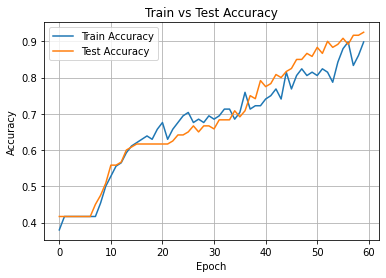

In [51]:
# model losses are stored in the model history
plt.plot(acc, label="Train Accuracy")
plt.plot(tst_acc, label="Test Accuracy")
plt.title("Train vs Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.grid()

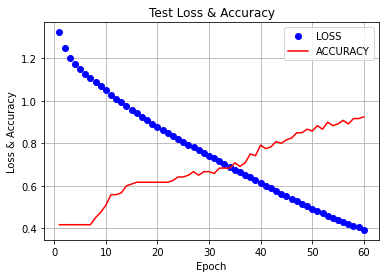

In [54]:
plt.plot(epochs,tst_losses,"bo",label="LOSS")
plt.plot(epochs,tst_acc,"r",label="ACCURACY")
plt.title("Test Loss & Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Loss & Accuracy")
plt.legend()
plt.grid()
plt.show()

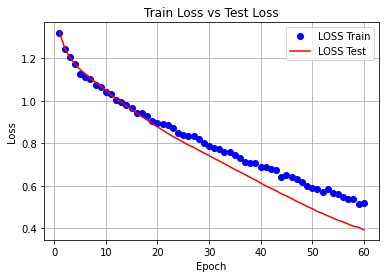

In [53]:
plt.plot(epochs,losses,"bo",label="LOSS Train")
plt.plot(epochs,tst_losses,"r",label="LOSS Test")
plt.title("Train Loss vs Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

In [46]:
prob_result = ANNmodel_test.predict(x_tst, batch_size=32, verbose=1)
prob_result

2/2 [==============================] - 0s 6ms/step


array([[7.84626305e-01, 1.72195554e-01, 3.41337770e-02, 9.04420577e-03],
       [7.91682363e-01, 1.68877080e-01, 3.15480754e-02, 7.89250433e-03],
       [7.71407723e-01, 1.86567321e-01, 3.40601318e-02, 7.96477962e-03],
       [6.95771337e-01, 2.44608939e-01, 4.86036763e-02, 1.10160895e-02],
       [7.88472950e-01, 1.70327544e-01, 3.27648669e-02, 8.43467098e-03],
       [7.91689932e-01, 1.69862300e-01, 3.09297387e-02, 7.51807028e-03],
       [5.86708307e-01, 3.24786365e-01, 7.24771172e-02, 1.60281826e-02],
       [4.67715472e-01, 4.07735646e-01, 1.02439962e-01, 2.21089441e-02],
       [3.50446999e-01, 4.81530100e-01, 1.38752654e-01, 2.92701591e-02],
       [3.13627459e-02, 4.14018571e-01, 4.43375379e-01, 1.11243308e-01],
       [6.29911572e-02, 5.02981246e-01, 3.56258005e-01, 7.77696073e-02],
       [1.72449067e-01, 5.61704218e-01, 2.21284524e-01, 4.45622802e-02],
       [1.12912059e-01, 5.55876791e-01, 2.75551885e-01, 5.56592271e-02],
       [2.48801425e-01, 5.35914302e-01, 1.78457558e

In [47]:
y_pred_classes = np.array([np.argmax(i) for i in prob_result]).astype("float32")
y_pred_classes = np.reshape(y_pred_classes, (34,1,1))
y_pred_classes.shape

(34, 1, 1)

In [48]:
import sklearn.metrics as skm


y_true = np.reshape(y_tst, (y_tst.shape[0], 1))
y_pred = np.reshape(y_pred_classes, (y_pred_classes.shape[0], 1))

cm = skm.multilabel_confusion_matrix(y_true, y_pred)
cm

array([[[26,  2],
        [ 0,  6]],

       [[26,  0],
        [ 3,  5]],

       [[27,  1],
        [ 1,  5]],

       [[19,  1],
        [ 0, 14]]])

In [49]:
print(skm.classification_report(y_true,y_pred, target_names= ["Agreeableness", "Conscientiousness", "Neuroticism", "Openness"]))

                   precision    recall  f1-score   support

    Agreeableness       0.75      1.00      0.86         6
Conscientiousness       1.00      0.62      0.77         8
      Neuroticism       0.83      0.83      0.83         6
         Openness       0.93      1.00      0.97        14

         accuracy                           0.88        34
        macro avg       0.88      0.86      0.86        34
     weighted avg       0.90      0.88      0.88        34

